In [1]:
#Importing the required modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the CSV file
df=pd.read_csv("/Users/admin/Downloads/spam_ham_dataset.csv")
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
df.shape

(5171, 4)

In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [6]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [7]:
#Dropping unwanted columns-Unnamed and label_num since label_num is same as label
df.drop(['Unnamed: 0','label_num'],axis=1,inplace=True)
df.head(10)

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
5,ham,Subject: ehronline web address change\r\nthis ...
6,ham,Subject: spring savings certificate - take 30 ...
7,spam,Subject: looking for medication ? we ` re the ...
8,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\..."


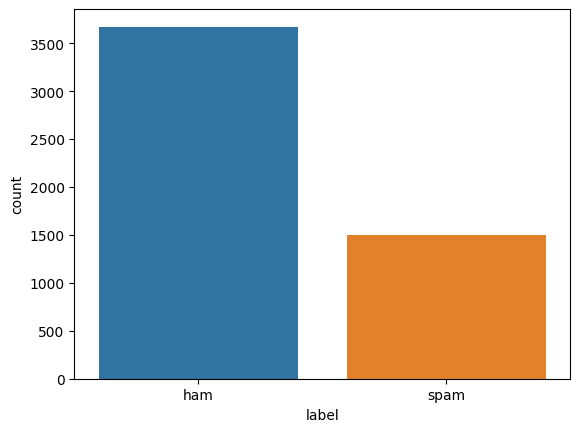

In [8]:
sns.countplot(data=df , x='label')
plt.show()

In [9]:
df.duplicated().sum()

178

In [10]:
df.drop_duplicates()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch..."
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169,ham,Subject: industrial worksheets for august 2000...


In [11]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [12]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [13]:
from nltk.tokenize import RegexpTokenizer
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    string=string.lower()
    tokens=reg.tokenize(string) 
    return " ".join(tokens)

In [14]:
df['text'] = df['text'].apply(lambda string: clean_str(string))
df['text'][0]

'subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes'

In [15]:
df.head()

,label,text
0,ham,subject enron methanol meter this is a follow ...
1,ham,subject hpl nom for january see attached file ...
2,ham,subject neon retreat ho ho ho we re around to ...
3,spam,subject photoshop windows office cheap main tr...
4,ham,subject re indian springs this deal is to book...


In [16]:
X=df['label']
y=df['text']
print(X)

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object


In [17]:
print(y)

0       subject enron methanol meter this is a follow ...
1       subject hpl nom for january see attached file ...
2       subject neon retreat ho ho ho we re around to ...
3       subject photoshop windows office cheap main tr...
4       subject re indian springs this deal is to book...
                              ...                        
5166    subject put the on the ft the transport volume...
5167    subject and following noms hpl can t take the ...
5168    subject calpine daily gas nomination julie as ...
5169    subject industrial worksheets for august activ...
5170    subject important online banking alert dear va...
Name: text, Length: 5171, dtype: object


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction=TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

In [20]:
#Scaling
y_train_featured=feature_extraction.fit_transform(y_train)
y_test_featured=feature_extraction.transform(y_test)

In [21]:
#Converting the text into Number form
print(y_train_featured)

  (0, 34843)	0.209674553125394
  (0, 17597)	0.21749164358073084
  (0, 35016)	0.25752744732861527
  (0, 24052)	0.14133037133722523
  (0, 12362)	0.23041955710463574
  (0, 21064)	0.18690079795641928
  (0, 20012)	0.12219812145536768
  (0, 20732)	0.1316413681304691
  (0, 31462)	0.25306377591220497
  (0, 34391)	0.17408496520088396
  (0, 8128)	0.16346769341772793
  (0, 23933)	0.18952860841730024
  (0, 21914)	0.18797819133930524
  (0, 13535)	0.21436091487202985
  (0, 23262)	0.21360930091171546
  (0, 8188)	0.2691224181448108
  (0, 30756)	0.41209823477907254
  (0, 22615)	0.4167946496245476
  (0, 33287)	0.04772650009362891
  (1, 26953)	0.12968696823568582
  (1, 23312)	0.16840793303087576
  (1, 23480)	0.1892561946689478
  (1, 11794)	0.19616932840527507
  (1, 9379)	0.19252222664107874
  (1, 23050)	0.2038437513299149
  :	:
  (4135, 15758)	0.12162838130188036
  (4135, 389)	0.26723642070815484
  (4135, 28828)	0.10925795588389492
  (4135, 23260)	0.08506967613644434
  (4135, 32084)	0.1104144485252494
  

In [22]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()
LogReg.fit(y_train_featured,X_train)

LogisticRegression()

In [23]:
y_pred_train=LogReg.predict(y_train_featured)

In [24]:
#Predicting Accuracy on Train data
from sklearn.metrics import accuracy_score
accuracy_train=accuracy_score(X_train,y_pred_train)
print('Accuracy on Train data: ',accuracy_train*100)

Accuracy on Train data:  99.63733075435202


In [25]:
#Predicting Accuracy on Test data
y_pred_test=LogReg.predict(y_test_featured)
accuracy_test=accuracy_score(X_test,y_pred_test)
print('Accuracy on Test data: ',accuracy_test*100)

Accuracy on Test data:  98.74396135265701
